<a href="https://colab.research.google.com/github/mariang168/SU_MSADS/blob/main/Lab_2_%26_Zip98340.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
## SAMPLE TIME SERIES USING RETAIL DATA
## BASED ON MILLER (2015) and BROWNLEE (2016)

import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox
import seaborn as sns
import numpy as np

## Setting Seaborn Styles
sns.set(style="whitegrid")
sns.set_palette((sns.color_palette('tab10', 8)))
dims = (11.7, 8.27)
%matplotlib inline

## Setting random seed
np.random.seed(1000)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Pull Zillow file
from google.colab import files
uploaded = files.upload()

Saving Zillow.csv to Zillow.csv


In [4]:
df = pd.read_csv("Zillow.csv").fillna(0)
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31-01-96,...,30-09-21,31-10-21,30-11-21,31-12-21,31-01-22,28-02-22,31-03-22,30-04-22,31-05-22,30-06-22
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,0.0000,...,2.699824e+06,2.675259e+06,2.658666e+06,2.621098e+06,2.790981e+06,2.814115e+06,2.824030e+06,2.923004e+06,2.731361e+06,2.816583e+06
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,317812.0606,...,8.016271e+05,8.141726e+05,8.148867e+05,8.141283e+05,8.251906e+05,8.292750e+05,8.395762e+05,8.470218e+05,8.640374e+05,8.677068e+05
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,0.0000,...,5.361896e+06,5.063155e+06,5.024305e+06,4.996161e+06,4.993120e+06,4.856957e+06,5.097956e+06,4.867790e+06,4.884866e+06,4.948800e+06
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,178452.3159,...,4.532286e+05,4.601853e+05,4.655159e+05,4.683509e+05,4.782437e+05,4.958321e+05,5.078121e+05,5.252991e+05,5.360357e+05,5.318325e+05
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,431188.2612,...,1.093501e+06,1.107552e+06,1.108345e+06,1.104561e+06,1.118305e+06,1.120555e+06,1.135402e+06,1.144952e+06,1.162540e+06,1.168553e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29762,95851,34430,89155,Zip,NV,NV,Las Vegas,Las Vegas-Henderson-Paradise,Clark County,190263.1373,...,4.852288e+05,4.891390e+05,4.977286e+05,5.015217e+05,5.204963e+05,5.323676e+05,5.440514e+05,5.506487e+05,5.646401e+05,5.669642e+05
29763,92623,34430,78712,Zip,TX,TX,Austin,Austin-Round Rock,Travis County,0.0000,...,1.170945e+05,1.193774e+05,1.243387e+05,1.272279e+05,1.278530e+05,1.268464e+05,1.329874e+05,1.310827e+05,1.327413e+05,1.355666e+05
29764,97088,34430,93009,Zip,CA,CA,Maricopa,Oxnard-Thousand Oaks-Ventura,Ventura County,0.0000,...,1.688364e+06,1.604399e+06,1.628815e+06,1.660111e+06,1.704245e+06,1.741679e+06,1.792536e+06,1.781154e+06,1.901311e+06,1.835249e+06
29765,59376,34430,4109,Zip,ME,ME,Portland,Portland-South Portland,Cumberland County,179037.0333,...,8.236910e+05,8.436631e+05,8.525958e+05,8.730664e+05,8.946203e+05,9.032266e+05,9.123490e+05,9.332271e+05,9.390379e+05,9.650993e+05


In [5]:
#Pull 2018tax file
from google.colab import files
uploaded = files.upload()

Saving 2018tax.csv to 2018tax.csv


In [6]:
df_irs = pd.read_csv("2018tax.csv").fillna(0)
df_irs

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,768120,466830,90960,198750,696930,37470,...,0,0,59030,50007,669420,1732176,666750,1725286,2730,4220
1,1,AL,0,2,503430,225110,130060,134320,457510,23180,...,0,0,77300,111047,424280,1230668,420960,1220934,4110,9399
2,1,AL,0,3,274590,95560,131770,41020,248630,13210,...,0,0,68920,148870,205830,562490,201770,550675,5790,15182
3,1,AL,0,4,174830,35560,123370,12700,159190,6830,...,0,0,47730,136776,126560,403410,122610,388967,3730,13784
4,1,AL,0,5,245150,25990,207950,6480,224280,10500,...,50,58,98980,446992,145780,598498,137120,521691,9850,65917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165930,56,WY,99999,2,3400,1920,1000,390,3070,120,...,0,0,490,746,2790,6947,2730,6793,40,48
165931,56,WY,99999,3,2390,1030,1130,200,2170,100,...,0,0,490,1314,1800,5036,1740,4809,50,104
165932,56,WY,99999,4,1850,530,1190,120,1730,70,...,0,0,430,1391,1340,4751,1270,4400,50,92
165933,56,WY,99999,5,2660,430,2150,90,2440,140,...,0,0,810,4135,1760,8021,1580,6678,190,1025


In [7]:
# arkansas metro areas
hot_springs = df.loc[(df['Metro'] == 'Hot Springs') & (df['State'] == 'AR')]
little_rock = df.loc[(df['Metro'] == 'Little Rock-North Little Rock-Conway') & (df['State'] == 'AR')]
fayetteville = df.loc[(df['Metro'] == 'Fayetteville-Springdale-Rogers') & (df['State'] == 'AR')]
searcy = df.loc[(df['Metro'] == 'Searcy') & (df['State'] == 'AR')]

In [8]:
#hot_springs
h_t = hot_springs.transpose()
h_t = pd.DataFrame(h_t)
h = h_t.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'])
#h = h.sort_index()
h.index.name = "Date"
h.index = pd.to_datetime(h.index)
h['average']= h.mean(axis=1)


In [9]:
#little_rock
l_t = little_rock.transpose()
l_t = pd.DataFrame(l_t)
l = l_t.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'])
#l = l.sort_index()
l.index.name = "Date"
l.index = pd.to_datetime(l.index)
l['average']= l.mean(axis=1)


In [10]:
#fayetteville
f_t = fayetteville.transpose()
f_t = pd.DataFrame(f_t)
f = f_t.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'])
#f = f.sort_index()
f.index.name = "Date"
f.index = pd.to_datetime(f.index)
f['average']= f.mean(axis=1)


In [11]:
#searcy
s_t = searcy.transpose()
s_t = pd.DataFrame(s_t)
s = s_t.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'])
#s = s.sort_index()
s.index.name = "Date"
s.index = pd.to_datetime(s.index)
s['average']= s.mean(axis=1)


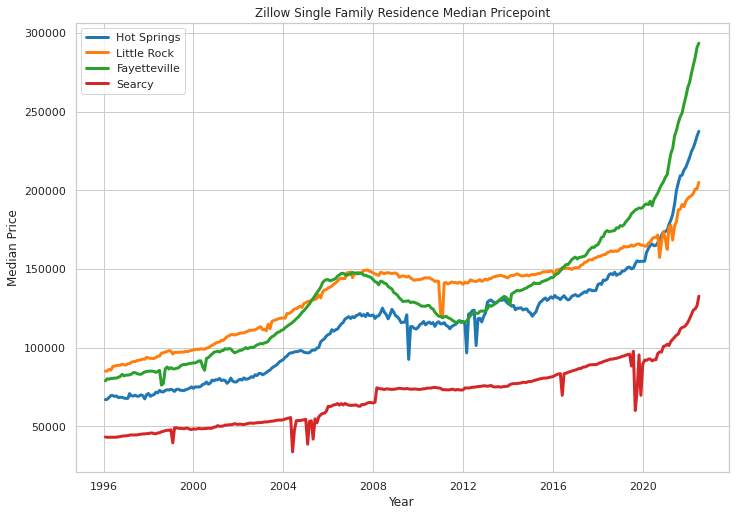

In [12]:
# EXPLORE - WHAT DOES THE DATA LOOK LIKE - IN A CHART?

fig, ax = plt.subplots(figsize = dims)
ax.plot(h['average'], linewidth=3)
ax.plot(l['average'], linewidth=3)
ax.plot(f['average'], linewidth=3)
ax.plot(s['average'], linewidth=3)
ax.set_ylabel('Median Price')
ax.set_xlabel('Year')
ax.set_title('Zillow Single Family Residence Median Pricepoint')
plt.gca().legend(('Hot Springs', 'Little Rock', 'Fayetteville', 'Searcy'))

In [13]:
df = df.rename(columns = {"RegionName":"zipcode"})
df_tax = pd.merge(df_irs, df, on = 'zipcode')
df_tax.drop(df_tax.index[df_tax['Metro'] == 'O'], inplace = True)
df_tax

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,30-09-21,31-10-21,30-11-21,31-12-21,31-01-22,28-02-22,31-03-22,30-04-22,31-05-22,30-06-22
0,1,AL,35004,1,1460,950,190,290,1290,90,...,232499.0056,237797.6173,244766.9439,2.495753e+05,2.469596e+05,2.502716e+05,2.572179e+05,2.574995e+05,2.650956e+05,2.586899e+05
1,1,AL,35004,2,1330,650,320,300,1220,60,...,232499.0056,237797.6173,244766.9439,2.495753e+05,2.469596e+05,2.502716e+05,2.572179e+05,2.574995e+05,2.650956e+05,2.586899e+05
2,1,AL,35004,3,990,370,430,150,920,40,...,232499.0056,237797.6173,244766.9439,2.495753e+05,2.469596e+05,2.502716e+05,2.572179e+05,2.574995e+05,2.650956e+05,2.586899e+05
3,1,AL,35004,4,610,110,440,50,560,20,...,232499.0056,237797.6173,244766.9439,2.495753e+05,2.469596e+05,2.502716e+05,2.572179e+05,2.574995e+05,2.650956e+05,2.586899e+05
4,1,AL,35004,5,740,70,650,30,670,50,...,232499.0056,237797.6173,244766.9439,2.495753e+05,2.469596e+05,2.502716e+05,2.572179e+05,2.574995e+05,2.650956e+05,2.586899e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159839,56,WY,83414,2,30,30,0,0,30,0,...,962628.0841,961491.0673,967833.4524,1.020325e+06,1.034501e+06,1.063819e+06,1.076075e+06,1.060376e+06,1.104322e+06,1.069055e+06
159840,56,WY,83414,3,30,0,30,0,20,0,...,962628.0841,961491.0673,967833.4524,1.020325e+06,1.034501e+06,1.063819e+06,1.076075e+06,1.060376e+06,1.104322e+06,1.069055e+06
159841,56,WY,83414,4,20,20,0,0,20,0,...,962628.0841,961491.0673,967833.4524,1.020325e+06,1.034501e+06,1.063819e+06,1.076075e+06,1.060376e+06,1.104322e+06,1.069055e+06
159842,56,WY,83414,5,40,0,30,0,30,0,...,962628.0841,961491.0673,967833.4524,1.020325e+06,1.034501e+06,1.063819e+06,1.076075e+06,1.060376e+06,1.104322e+06,1.069055e+06


In [14]:
df_tax.drop(df_tax.index[df_tax['STATE'] == 'DC'], inplace = True)

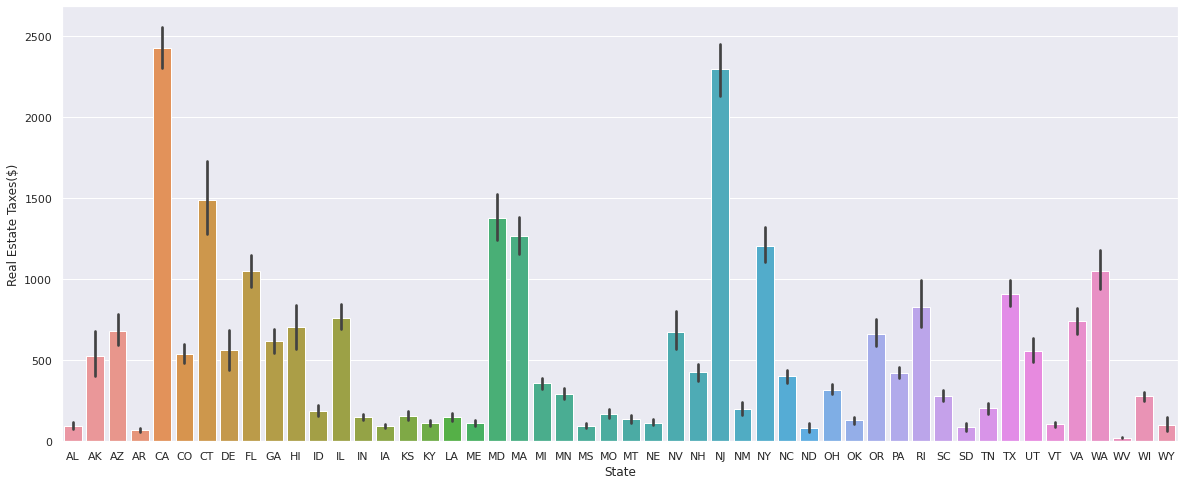

In [15]:
#N18500 Real Estate taxes amount
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'STATE', y = 'A18500', data = df_tax )
plt.xlabel("State")
plt.ylabel("Real Estate Taxes($)")
plt.show()

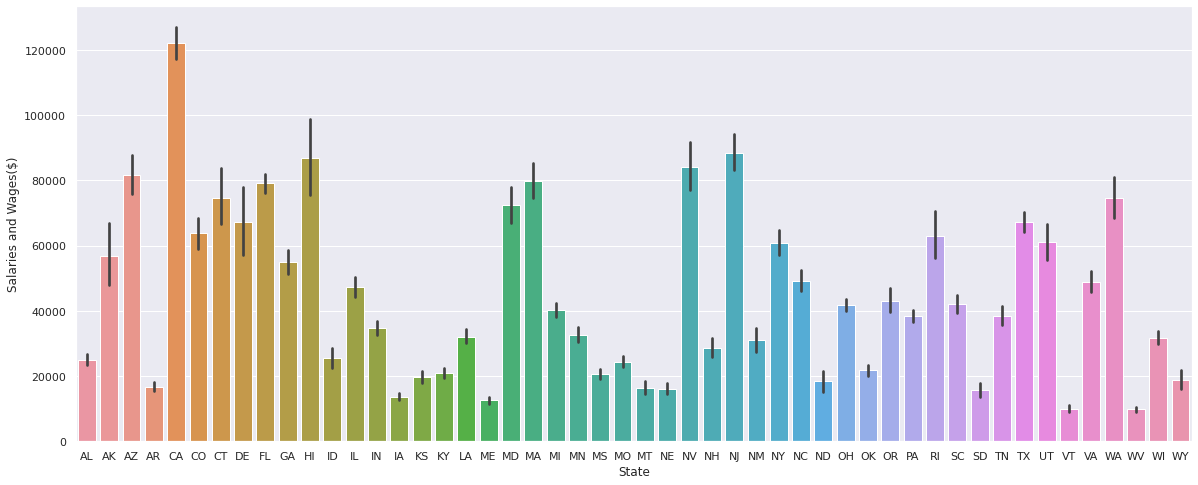

In [16]:
#A00200 Salaries and Wages Amount
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'STATE', y = 'A00200', data = df_tax )
plt.xlabel("State")
plt.ylabel("Salaries and Wages($)")
plt.show()

In [17]:
WA = df_tax.loc[(df_tax['State'] == 'WA')]
OR = df_tax.loc[(df_tax['State'] == 'OR')]
CA = df_tax.loc[(df_tax['State'] == 'CA')]

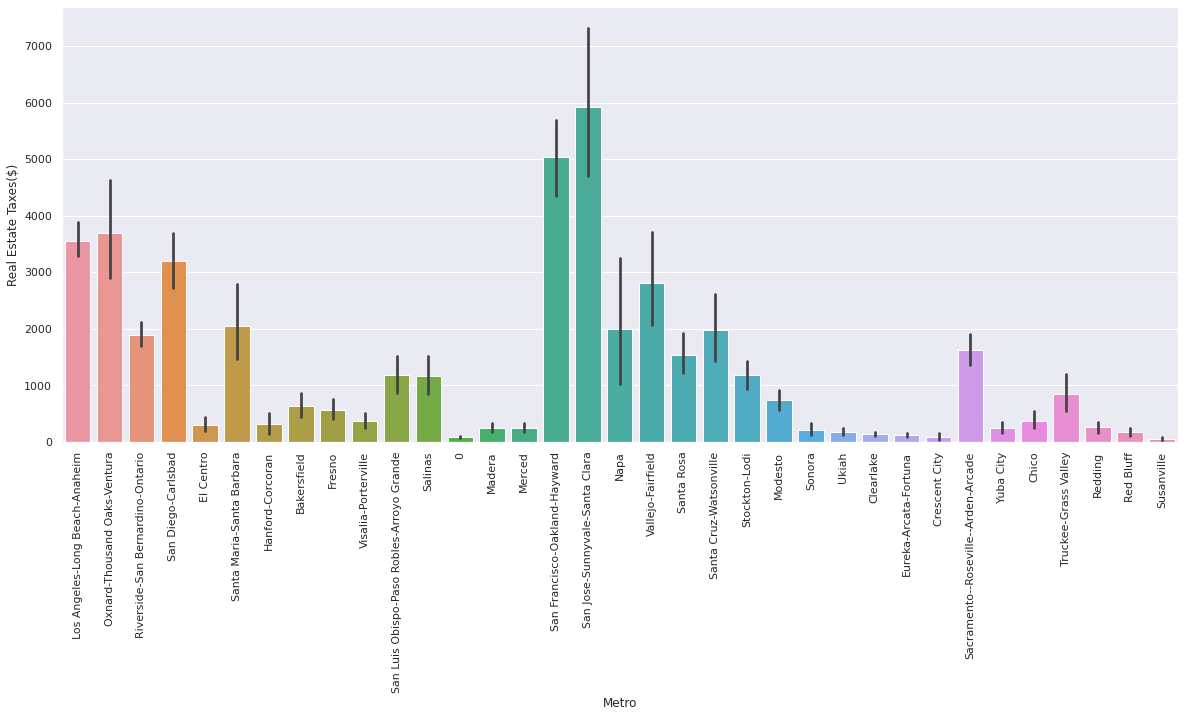

In [18]:
#N18500 Real Estate taxes amount
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'Metro', y = 'A18500', data = CA)
plt.xlabel("Metro")
plt.ylabel("Real Estate Taxes($)")
plt.xticks(rotation=90)
plt.show()

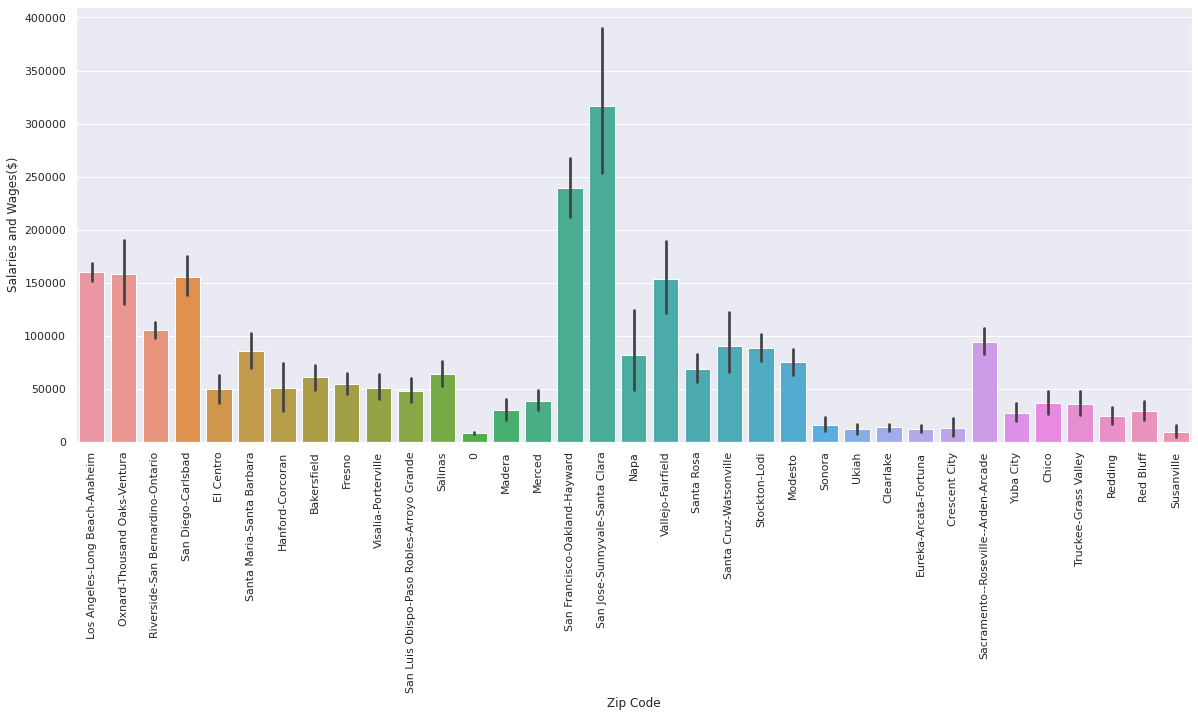

In [20]:
#A00200 Salaries and Wages Amount
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'Metro', y = 'A00200', data = CA )
plt.xlabel("Zip Code")
plt.ylabel("Salaries and Wages($)")
plt.xticks(rotation=90)
plt.show()

In [21]:
CA_1 = df_tax.loc[(df_tax['Metro'] == 'San Francisco-Oakland-Hayward') & (df_tax['State'] == 'CA')]

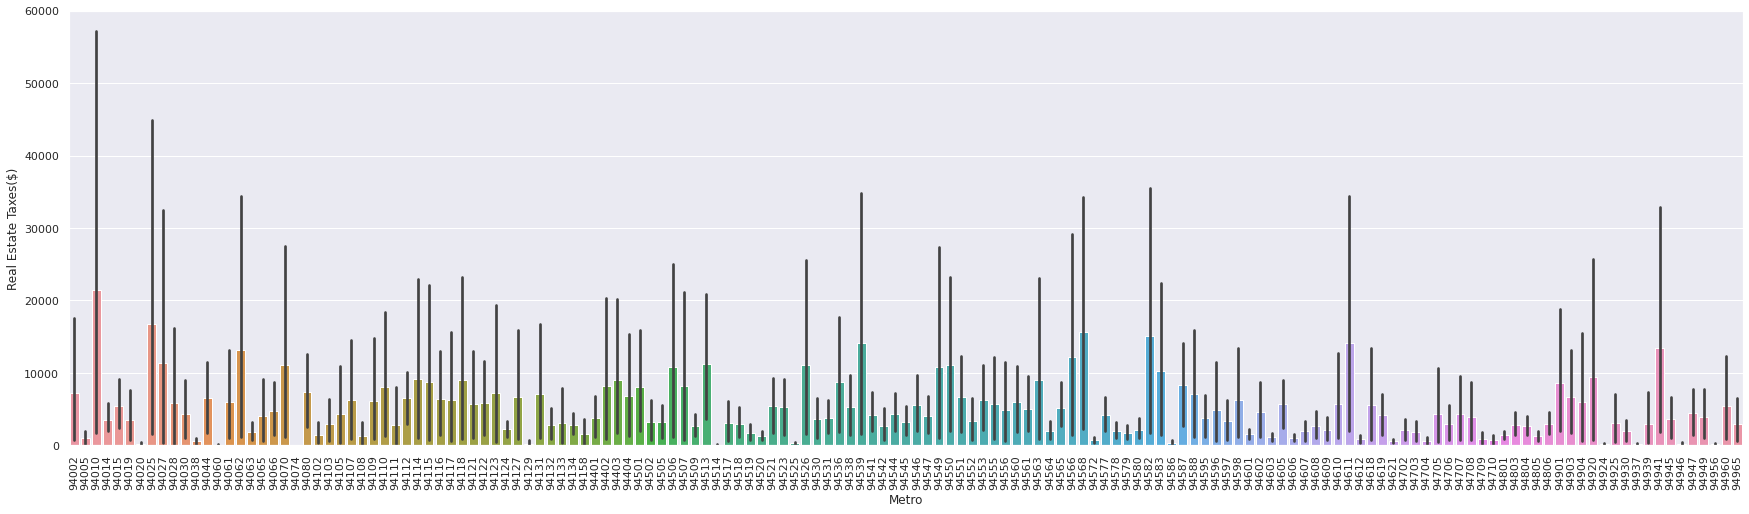

In [24]:
#N18500 Real Estate taxes amount
sns.set(rc = {'figure.figsize':(30,8)})
sns.barplot(x = 'zipcode', y = 'A18500', data = CA_1)
plt.xlabel("Metro")
plt.ylabel("Real Estate Taxes($)")
plt.xticks(rotation=90)
plt.show()
#94804

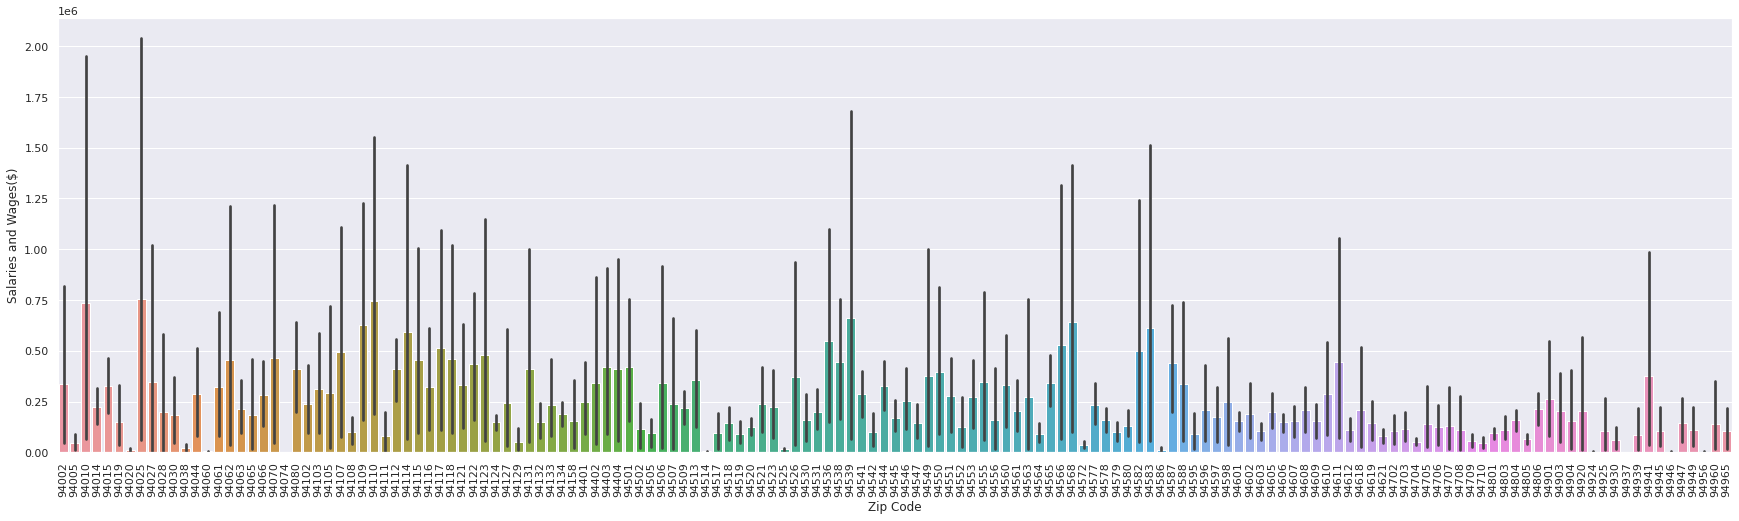

In [27]:
#A00200 Salaries and Wages Amount
sns.set(rc = {'figure.figsize':(30,8)})
sns.barplot(x = 'zipcode', y = 'A00200', data = CA_1 )
plt.xlabel("Zip Code")
plt.ylabel("Salaries and Wages($)")
plt.xticks(rotation=90)
plt.show()
#94804

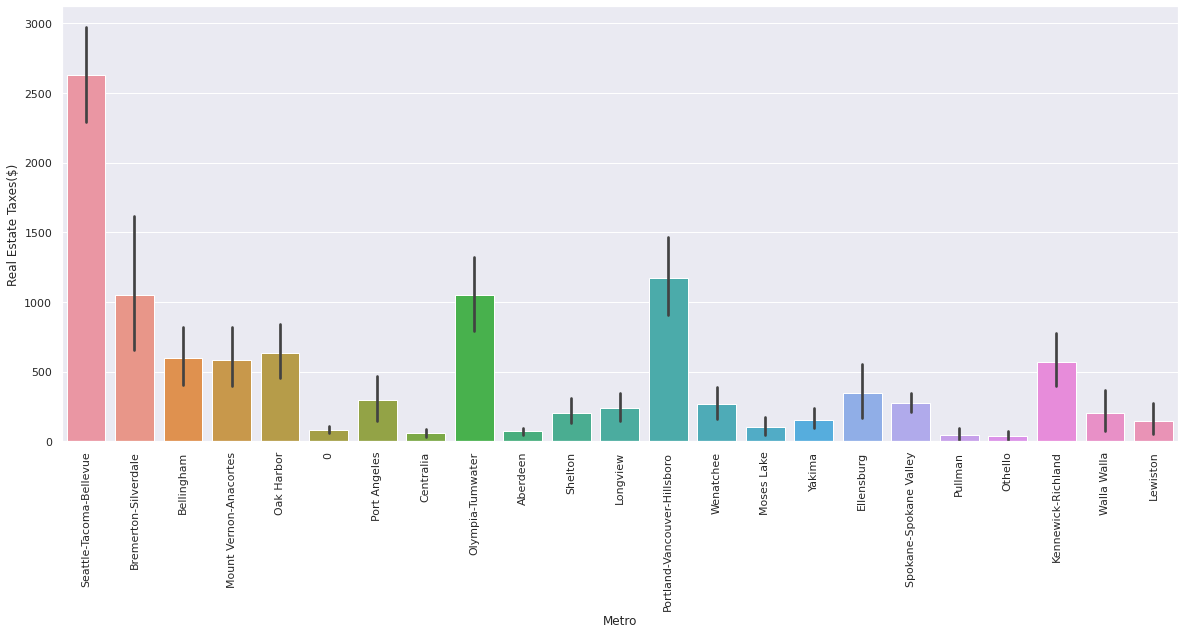

In [29]:
#N18500 Real Estate taxes amount
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'Metro', y = 'A18500', data = WA)
plt.xlabel("Metro")
plt.ylabel("Real Estate Taxes($)")
plt.xticks(rotation=90)
plt.show()

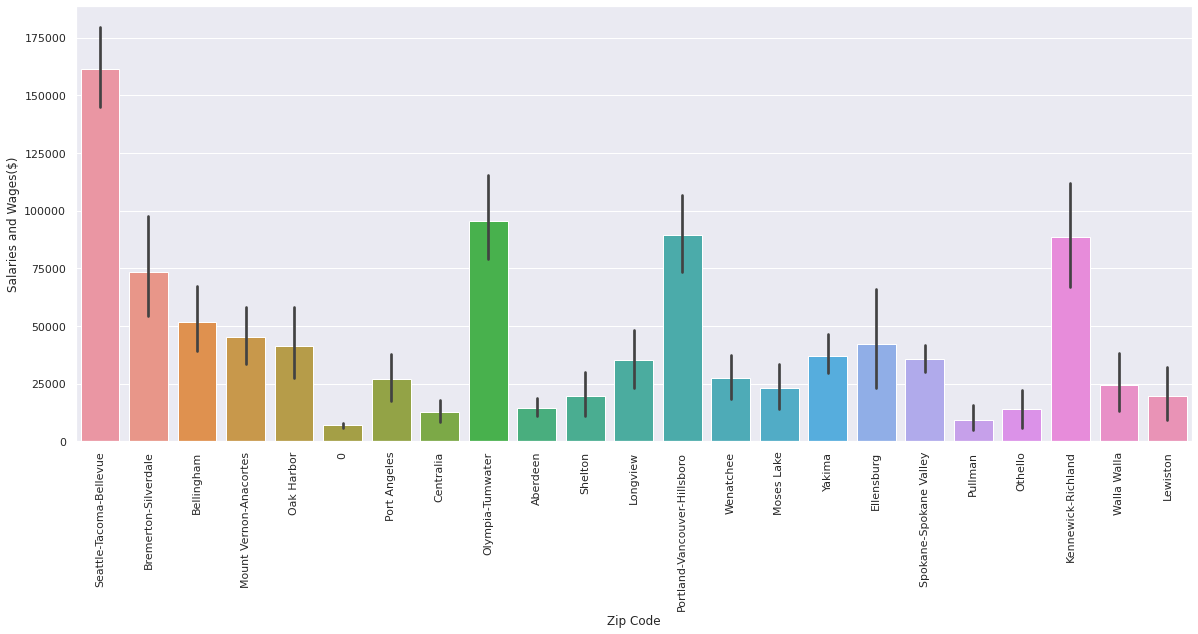

In [32]:
#A00200 Salaries and Wages Amount
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'Metro', y = 'A00200', data = WA )
plt.xlabel("Zip Code")
plt.ylabel("Salaries and Wages($)")
plt.xticks(rotation=90)
plt.show()

In [33]:
WA_1 = df_tax.loc[(df_tax['Metro'] == 'Bremerton-Silverdale') & (df_tax['State'] == 'WA')]

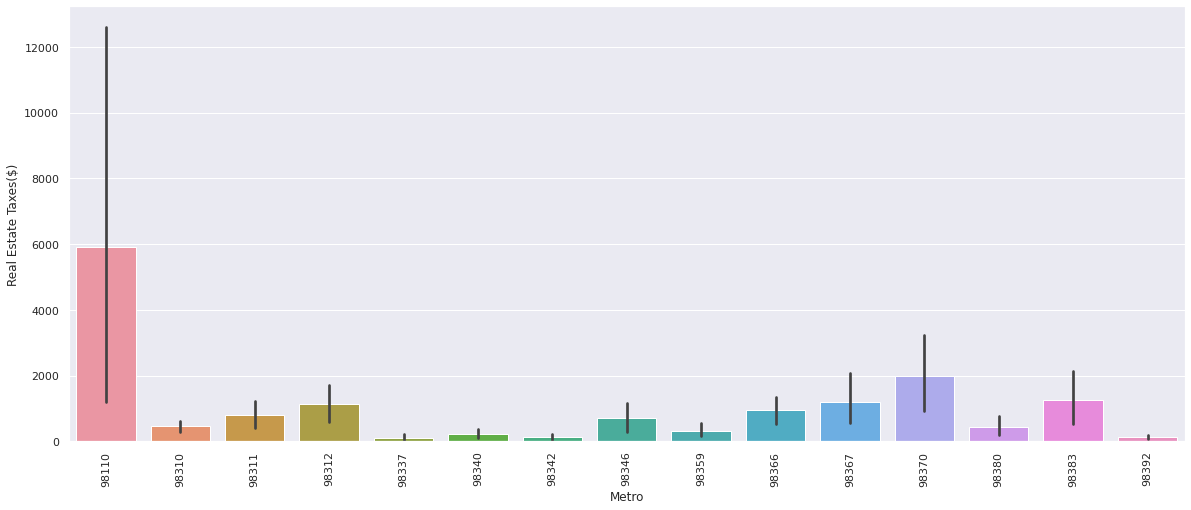

In [34]:
#N18500 Real Estate taxes amount
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'zipcode', y = 'A18500', data = WA_1 )
plt.xlabel("Metro")
plt.ylabel("Real Estate Taxes($)")
plt.xticks(rotation=90)
plt.show()
#98340

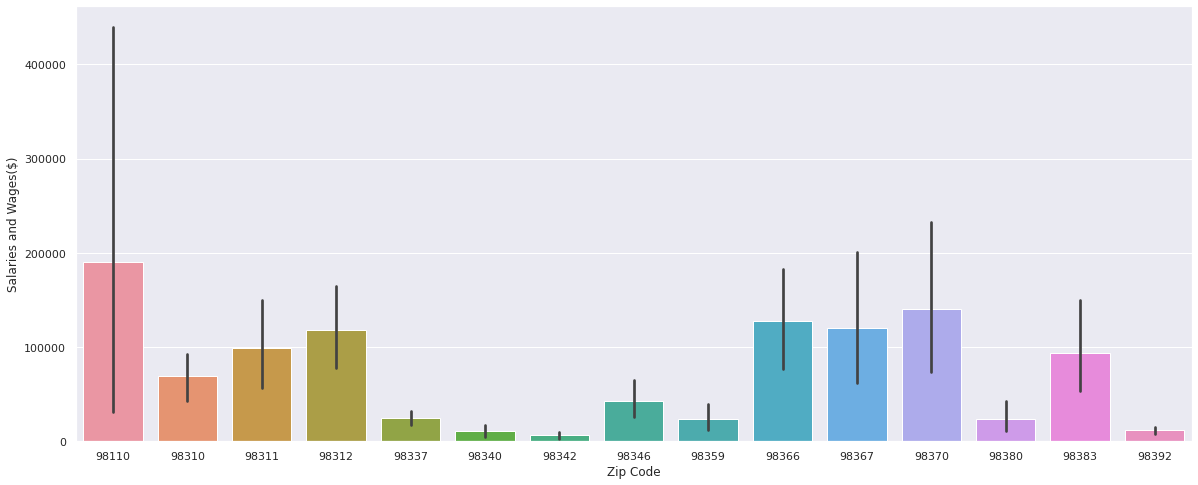

In [35]:
#A00200 Salaries and Wages Amount
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'zipcode', y = 'A00200', data = WA_1 )
plt.xlabel("Zip Code")
plt.ylabel("Salaries and Wages($)")
plt.show()
#98340

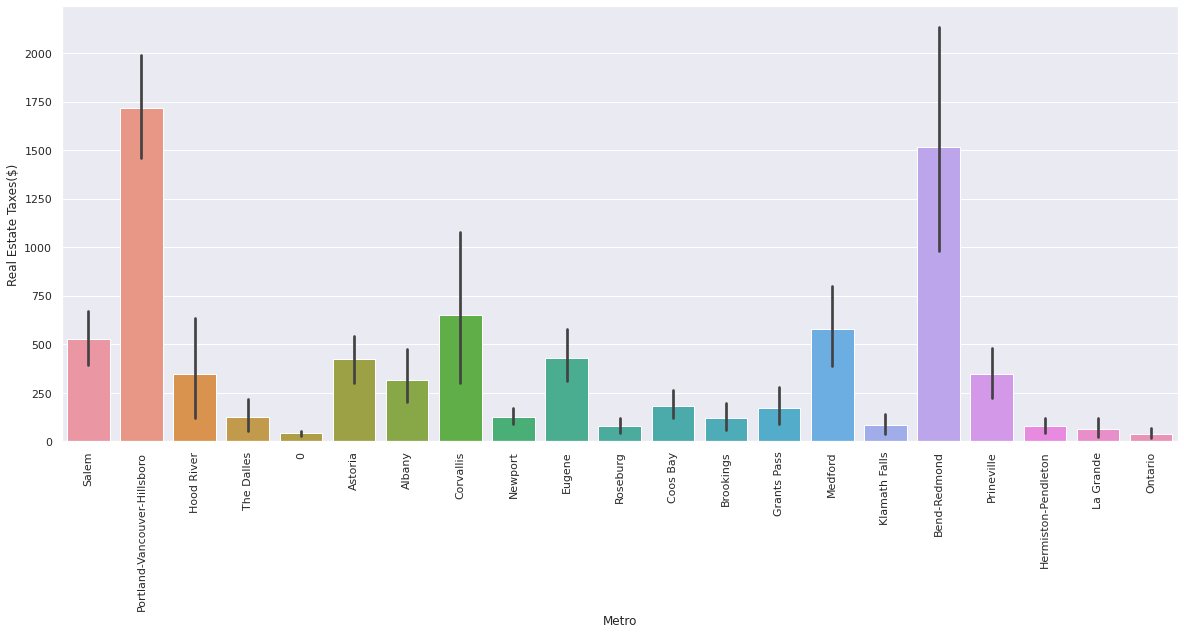

In [37]:
#N18500 Real Estate taxes amount
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'Metro', y = 'A18500', data = OR)
plt.xlabel("Metro")
plt.ylabel("Real Estate Taxes($)")
plt.xticks(rotation=90)
plt.show()

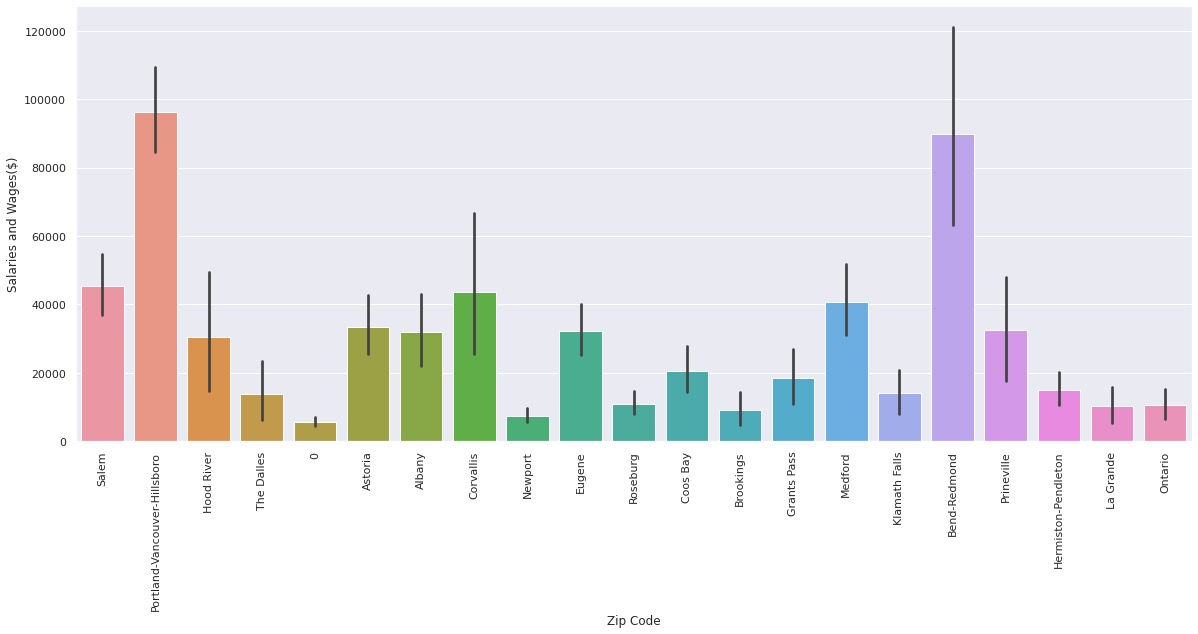

In [38]:
#A00200 Salaries and Wages Amount
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'Metro', y = 'A00200', data = OR )
plt.xlabel("Zip Code")
plt.ylabel("Salaries and Wages($)")
plt.xticks(rotation=90)
plt.show()

In [70]:
OR_1 = df_tax.loc[(df_tax['Metro'] == 'Portland-Vancouver-Hillsboro') & (df_tax['State'] == 'OR')]

STATEFIPS      int64
STATE         object
zipcode        int64
agi_stub       int64
N1             int64
              ...   
28-02-22     float64
31-03-22     float64
30-04-22     float64
31-05-22     float64
30-06-22     float64
Length: 479, dtype: object

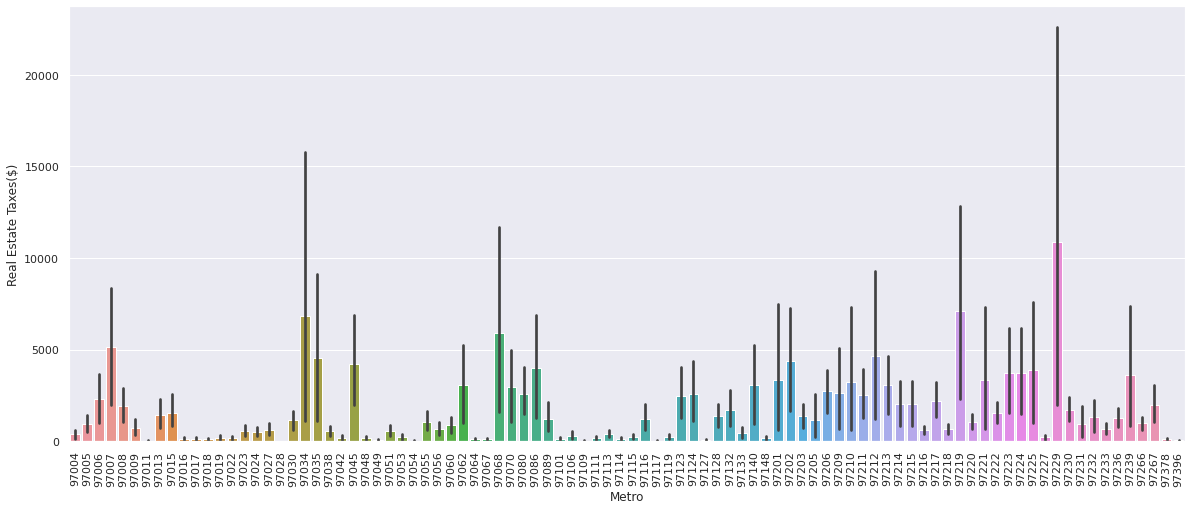

In [39]:
#N18500 Real Estate taxes amount
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'zipcode', y = 'A18500', data = OR_1 )
plt.xlabel("Metro")
plt.ylabel("Real Estate Taxes($)")
plt.xticks(rotation=90)
plt.show()
#97212

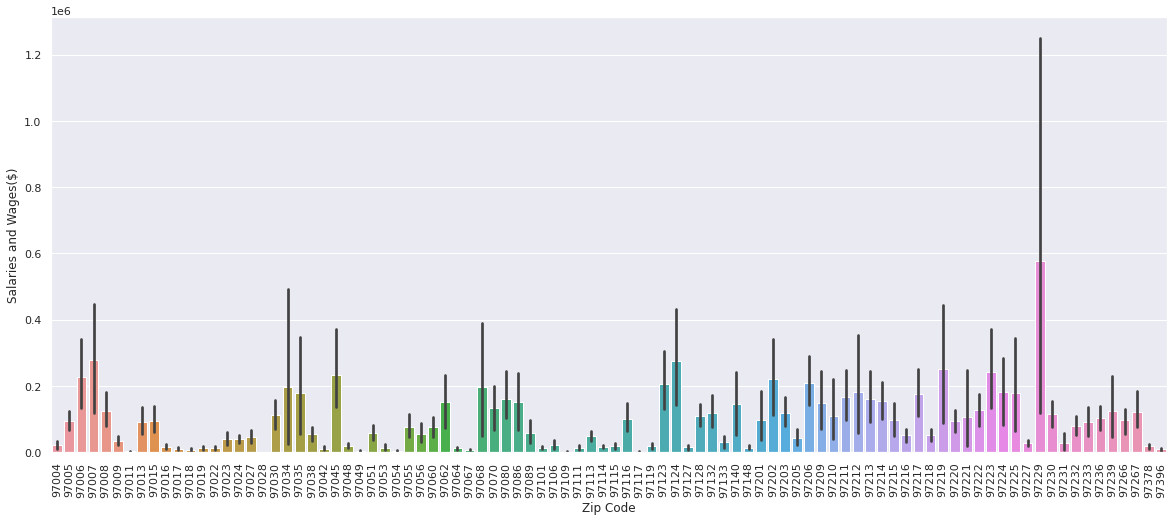

In [40]:
#A00200 Salaries and Wages Amount
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x = 'zipcode', y = 'A00200', data = OR_1 )
plt.xlabel("Zip Code")
plt.ylabel("Salaries and Wages($)")
plt.xticks(rotation=90)
plt.show()
#97212

In [50]:
CA_1

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,30-09-21,31-10-21,30-11-21,31-12-21,31-01-22,28-02-22,31-03-22,30-04-22,31-05-22,30-06-22
13024,6,CA,94002,1,2380,2030,210,110,1980,250,...,2312241.786,2344078.400,2379853.742,2412658.434,2454196.247,2510545.846,2551809.097,2597690.122,2635316.987,2603654.409
13025,6,CA,94002,2,1500,1070,270,130,1280,120,...,2312241.786,2344078.400,2379853.742,2412658.434,2454196.247,2510545.846,2551809.097,2597690.122,2635316.987,2603654.409
13026,6,CA,94002,3,1420,960,310,120,1250,90,...,2312241.786,2344078.400,2379853.742,2412658.434,2454196.247,2510545.846,2551809.097,2597690.122,2635316.987,2603654.409
13027,6,CA,94002,4,1220,710,390,90,1070,90,...,2312241.786,2344078.400,2379853.742,2412658.434,2454196.247,2510545.846,2551809.097,2597690.122,2635316.987,2603654.409
13028,6,CA,94002,5,3020,1110,1650,230,2680,200,...,2312241.786,2344078.400,2379853.742,2412658.434,2454196.247,2510545.846,2551809.097,2597690.122,2635316.987,2603654.409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14153,6,CA,94965,2,870,630,110,100,730,60,...,2037652.108,2017011.938,2049001.883,2055209.344,2091865.058,2176147.408,2232503.110,2298346.831,2339424.068,2384468.316
14154,6,CA,94965,3,670,490,120,50,580,40,...,2037652.108,2017011.938,2049001.883,2055209.344,2091865.058,2176147.408,2232503.110,2298346.831,2339424.068,2384468.316
14155,6,CA,94965,4,580,400,130,40,520,30,...,2037652.108,2017011.938,2049001.883,2055209.344,2091865.058,2176147.408,2232503.110,2298346.831,2339424.068,2384468.316
14156,6,CA,94965,5,1370,790,490,60,1240,70,...,2037652.108,2017011.938,2049001.883,2055209.344,2091865.058,2176147.408,2232503.110,2298346.831,2339424.068,2384468.316


In [1]:
#Pull Zip97212, Zip94804, Zip98340 file
from google.colab import files
uploaded = files.upload()

Saving Zip98340.csv to Zip98340.csv


In [4]:
#Zip97212 = pd.read_csv("Zip97212.csv").fillna(0)
#Zip94804 = pd.read_csv("Zip94804.csv").fillna(0)
Zip98340 = pd.read_csv("Zip98340.csv").fillna(0)

In [5]:
#Zip98340
W_t = Zip98340.transpose()
W_t = pd.DataFrame(W_t)
W = W_t.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'])
#O = O.sort_index()
W.index.name = "Date"
W.index = pd.to_datetime(W.index)
W['Price']= W.mean(axis=1)
W

,0,Price
Date,,
1996-01-31,191011.3635,191011.3635
1996-02-29,192316.2851,192316.2851
1996-03-31,190654.1577,190654.1577
1996-04-30,191905.3462,191905.3462
1996-05-31,194219.0758,194219.0758
...,...,...
2022-02-28,838026.7311,838026.7311
2022-03-31,836825.286,836825.2860
2022-04-30,850128.4288,850128.4288


In [6]:
# EXPLORE - IS OUR TIME SERIES STATIONARY OR NOT?

result = adfuller(W['Price'], autolag='AIC')

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.555434
p-value: 0.986464
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


ADF Statistic: -0.971599
p-value: 0.763481
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572


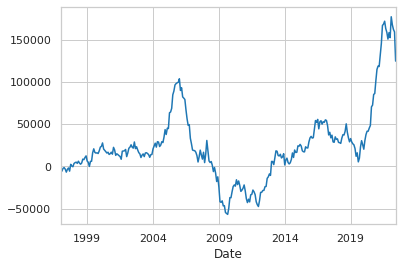

In [7]:
# SCRUB - OUR TIME SERIES IS NOT STATIONARY - WE NEED TO TAKE THE DIFFERENCE
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

#X = O['Price']
X = W['Price']
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = W.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

# plot
stationary.plot()

In [8]:
# SCRUB - SOME CODE TO INVERT DIFFERENCE VALUE

def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

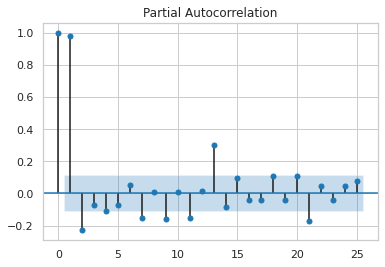

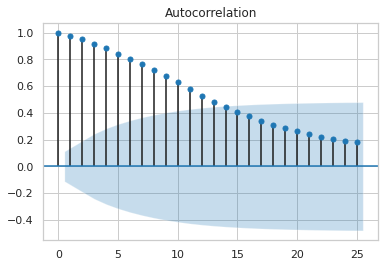

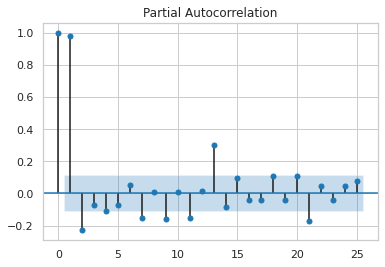

In [9]:
# USING STATIONARY TIME SERIES LOOK AT ACF

series = stationary

plot_acf(series)
plot_pacf(series)

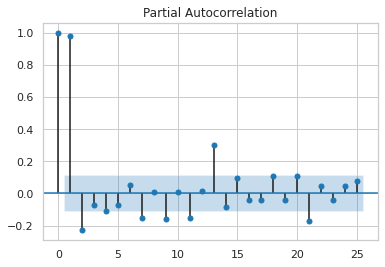

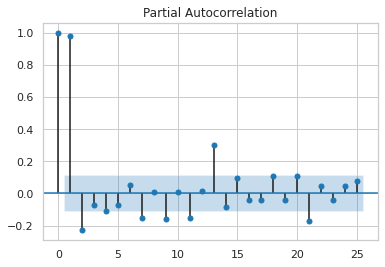

In [10]:
# USING STATIONARY TIME SERIES LOOK FOR PACF

plot_pacf(series)

In [12]:
# BUILD THE MODEL - USING ORIGINAL SERIES1 DATA

# prepare data
#X = O['Price']
X = W['Price']
X = X.astype('float32')
train_size = int(len(X) * 0.75)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	months_in_year = 12
	diff = difference(history, months_in_year)
	# predict
	model = ARIMA(diff, order=(2,1,0))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, months_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)

>Predicted=383413.675, Expected=390623
>Predicted=389331.306, Expected=393924
>Predicted=396784.180, Expected=398030
>Predicted=402015.825, Expected=399605
>Predicted=404042.475, Expected=404470
>Predicted=403125.885, Expected=413707
>Predicted=415563.936, Expected=424989
>Predicted=427482.746, Expected=424183
>Predicted=426929.405, Expected=430004
>Predicted=441303.460, Expected=430139
>Predicted=426588.806, Expected=435027
>Predicted=437065.031, Expected=439009
>Predicted=445234.941, Expected=440527
>Predicted=443804.212, Expected=446754
>Predicted=450678.805, Expected=450071
>Predicted=451807.540, Expected=454606
>Predicted=459493.544, Expected=458773
>Predicted=468178.611, Expected=461872
>Predicted=472962.989, Expected=462177
>Predicted=460640.248, Expected=464505
>Predicted=469771.619, Expected=463743
>Predicted=463922.991, Expected=467048
>Predicted=471559.994, Expected=463958
>Predicted=468021.588, Expected=467472
>Predicted=468393.095, Expected=475442
>Predicted=481764.042, Ex

In [ ]:
# CODE RUNS LONG FOR EVALUATION - approximately 34 mins on COLAB
import warnings
import numpy
  
 
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.75)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		# difference data
		months_in_year = 12
		diff = difference(history, months_in_year)
		model = ARIMA(diff, order=arima_order)
		model_fit = model.fit(trend='nc', disp=0)
		yhat = model_fit.forecast()[0]
		yhat = inverse_difference(history, yhat, months_in_year)
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	mse = mean_squared_error(test, predictions)
	rmse = sqrt(mse)
	return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s RMSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# LOAD DATA

#series = O['Price']
series = W['Price']
# evaluate parameters
p_values = range(0, 9)
d_values = range(0, 3)
q_values = range(0, 9)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

In [ ]:
#Zip97212 ARIMA()
#@title
# SIMILAR BLOCK OF CODE - THIS ONE SAVES RESIDUALS FOR PLOTTING

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = O['Price']
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.75)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# difference data
	weeks_in_year = 52
	diff = difference(history, weeks_in_year)
	# predict
	model = ARIMA(diff, order=(0,1,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = inverse_difference(history, yhat, weeks_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# plot
residuals.hist(ax=plt.gca())
plt.show()

residuals.plot(kind='kde', ax=plt.gca())
plt.show()

In [ ]:
# MODEL - INTERPRET 
# RECREATE ANALYSIS WITH MEAN RESIDUAL ADDED TO EACH PREDICTION
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load data
series = O['Price']
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.75)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
bias = -120.713087
for i in range(len(test)):
	# difference data
	weeks_in_year = 52
	diff = difference(history, weeks_in_year)
	# predict
	model = ARIMA(diff, order=(0,1,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, weeks_in_year)
	predictions.append(yhat)
	# observation
	obs = test[i]
	history.append(obs)
# errors
residuals = [test[i]-predictions[i] for i in range(len(test))]
residuals = DataFrame(residuals)
print(residuals.describe())
# report performance
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
# plot
residuals.hist(ax=plt.gca())
plt.show()

residuals.plot(kind='kde', ax=plt.gca())
plt.show()

In [ ]:
# INTERPRET -LOOK AT ACF AND PACF FOR RESIDUALS
# Ideally all residuals are not significant and mean==0
plot_acf(residuals, ax=plt.gca())
plt.show()

plot_pacf(residuals, ax=plt.gca())
plt.show()

In [ ]:
# MODEL - CODE FROM BROWNLEE FOR SAVING MODEL
# NOTE:  This will save in your google drive UNLESS you specified a particular
# working directory

# monkey patch around bug in ARIMA class
def __getnewargs__(self):
	return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))

ARIMA.__getnewargs__ = __getnewargs__

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

# prepare data
X = O['Price']
X = X.astype('float32')
# difference data
weeks_in_year = 52
diff = difference(X, weeks_in_year)
# fit model
model = ARIMA(diff, order=(0,1,1))
model_fit = model.fit(trend='nc', disp=0)
# bias constant, could be calculated from in-sample mean residual - CHANGED TO ZERO
bias = 0
# save model
model_fit.save('model.pkl')
numpy.save('model_bias.npy', [bias])

In [ ]:
# MODEL
# CODE FOR MAKING PREDICTION USING SAVED MODEL - LOOKING ONE STEP AHEAD

def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

series = O['Price']
weeks_in_year = 52
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(series.values, yhat, weeks_in_year)
print('Predicted: %.3f' % yhat)

In [ ]:
#Pull Zip97212, Zip94804, Zip98340 file
from google.colab import files
uploaded = files.upload()

In [ ]:
# INTERPRET - CREATE TRAIN-TEST DATA
# DATA IS WEEKLY FOR 2+ years
# KEEP ONE QUARTER - 13 weeks - AS THE TEST DATA

series1 = pd.read_csv('O.csv', header=0,
                      index_col="Date", parse_dates=["Date"])
split_point = len(series) - 13
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

# STORES TO LOCAL DRIVE
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

In [ ]:
# MODEL & INTERPRET - 
# CODE FOR MAKING PREDICTION USING SAVED MODEL - LOOKING MANY STEPS AHEAD
# NEED VALIDATION FILE FROM ABOVE


def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# load and prepare datasets
dataset = O['Price']
X = dataset.values.astype('float32')
history = [x for x in X]
weeks_in_year = 52
#validation = Series.from_csv('validation.csv', header=0)
y = validation.values.astype('float32')
# load model
model_fit = ARIMAResults.load('model.pkl')
bias = numpy.load('model_bias.npy')
# make first prediction
predictions = list()
yhat = float(model_fit.forecast()[0])
yhat = bias + inverse_difference(history, yhat, weeks_in_year)
predictions.append(yhat)
history.append(y[0])
print('>Predicted=%.3f, Expected=%3.f' % (yhat, y[0]))
# rolling forecasts
for i in range(1, len(y)):
	# difference data
	weeks_in_year = 52
	diff = difference(history, weeks_in_year)
	# predict
	model = ARIMA(diff, order=(0,1,1))
	model_fit = model.fit(trend='nc', disp=0)
	yhat = model_fit.forecast()[0]
	yhat = bias + inverse_difference(history, yhat, weeks_in_year)
	predictions.append(yhat)
	# observation
	obs = y[i]
	history.append(obs)
	print('>Predicted=%.3f, Expected=%3.f' % (yhat, obs))
# report performance
mse = mean_squared_error(y, predictions)
rmse = sqrt(mse)
print('RMSE: %.3f' % rmse)
fig, ax = plt.subplots(figsize = dims)
plt.plot(y)
plt.plot(predictions, color='red')
plt.xlabel("Month")
plt.ylabel("Zip Code 97212 Predicted Home Price")
plt.title("2022 Projected Median Home Price 97212")
plt.show()